In [82]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry
import shapely
import rasterio
import rioxarray
from rasterio.features import shapes
from shapely.geometry import shape
import matplotlib.pyplot as plt
from pathlib import Path

from shapely import affinity
from shapely.geometry.multipolygon import MultiPolygon
from scipy.spatial import Voronoi

In [83]:
weight_wind = [
    0.057, #landuse
    0.044, #slope
    0.088, #elevation
    0.071, #d to settlement
    0.044, #d to wetland
    0.055, #d to forest
    0.044, #prox to road
    0.088, #prox to sub
    0.261, #Resource quality
    0.247 #Farm Required area
    ]
print(sum(weight_wind))

weight_solar = [
    0.140, #landuse
    0.126, #slope
    0.063, #elevation
    0.057, #d to settlement
    0.0495, #d to wetland
    0.0275, #d to forest
    0.047, #prox to road
    0.099, #prox to sub
    0.254, #Resource quality
    0.135 #Farm Required area
    ]
print(sum(weight_solar))

0.999
0.998


In [84]:
## Create teh final SI map template ###
xr_final_SI = xr.open_dataset('Output\\xr_SI_Landcover.nc')
xr_final_SI = xr_final_SI.drop_vars('lccs_class')
xr_final_SI = xr_final_SI.drop_vars('SI_BGEC')
xr_final_SI = xr_final_SI.drop_vars('SI_Biomass')
xr_final_SI = xr_final_SI.drop_vars('SI_BGWW')
xr_final_SI = xr_final_SI.drop_vars('SI_MSW')
xr_final_SI = xr_final_SI.drop_vars('SI_IEW')
xr_final_SI = xr_final_SI.drop_vars('aux')

xr_final_SI['AVA_Wind'] = xr_final_SI['SI_Wind']
xr_final_SI['AVA_Solar'] = xr_final_SI['SI_Solar']

xr_final_SI['SI_Wind'] = 0.0
xr_final_SI['SI_Solar'] = 0.0
xr_final_SI['AVA_Wind'] = 0.0
xr_final_SI['AVA_Solar'] = 0.0
print(xr_final_SI)
check_weight_wind = 0
check_weight_solar = 0

<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   float64 0.0
    SI_Wind    float64 0.0
    AVA_Wind   float64 0.0
    AVA_Solar  float64 0.0


<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.057
check w solar =  0.14
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(156390.93)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(156390.93)


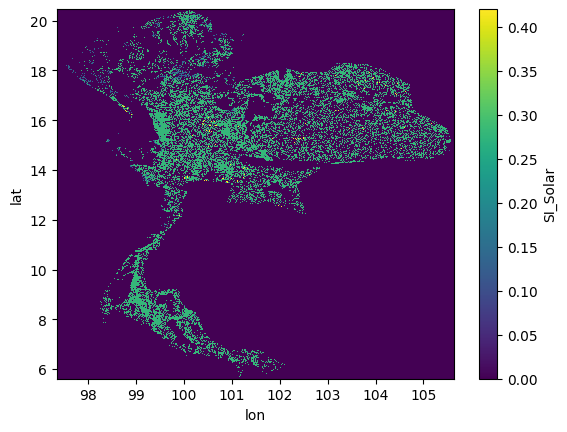

In [85]:
xr_landuse_suitability_index = xr.open_dataset('Output\\xr_SI_Landcover.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_landuse_suitability_index['SI_Wind'] * weight_wind[0])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_landuse_suitability_index['SI_Solar'] * weight_solar[0])
xr_final_SI['AVA_Wind'] = xr.where(xr_landuse_suitability_index['SI_Wind'] > 0 ,0.09,0)
xr_final_SI['AVA_Solar'] = xr.where(xr_landuse_suitability_index['SI_Solar'] > 0 ,0.09,0)

print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[0]
check_weight_solar = check_weight_solar + weight_solar[0]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

xr_final_SI['SI_Solar'].plot()

<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.101
check w solar =  0.266
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(149835.78)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(129665.25)


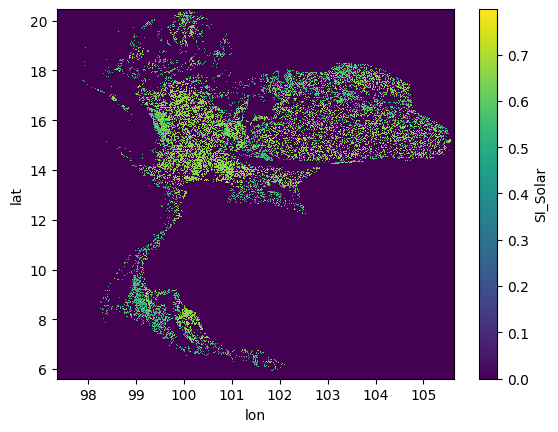

In [86]:
xr_cal = xr.open_dataset('Output\\xr_SI_Slope.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[1])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[1])

# cutout area for slope 
xr_final_SI['AVA_Wind'] = xr.where( xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where( xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[1]
check_weight_solar = check_weight_solar + weight_solar[1]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

xr_final_SI['SI_Solar'].plot()

<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.189
check w solar =  0.329
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(149835.78)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(129665.25)


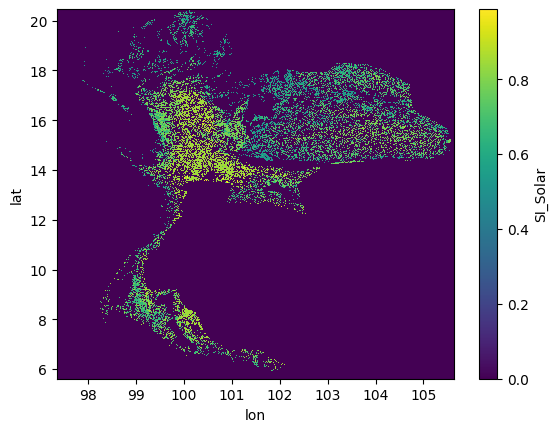

In [87]:
xr_cal = xr.open_dataset('Output\\xr_SI_Elevation.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[2])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[2])
## NO Cutout area for elevation 
# xr_final_SI['AVA_Wind'] = xr.where( xr_cal['suitability_index'] == 0 ,0,xr_final_SI['AVA_Wind'])
# xr_final_SI['AVA_Solar'] = xr.where( xr_cal['suitability_index'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[2]
check_weight_solar = check_weight_solar + weight_solar[2]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

xr_final_SI['SI_Solar'].plot()

In [88]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetosettlementarea.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[3])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[3])

xr_final_SI['AVA_Wind'] = xr.where(xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where(xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[3]
check_weight_solar = check_weight_solar + weight_solar[3]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.26
check w solar =  0.386
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(141341.4)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(121297.5)


<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.304
check w solar =  0.4355
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(137527.65)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(117638.64)


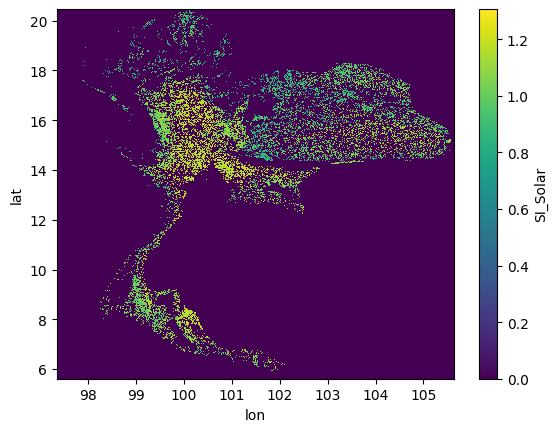

In [89]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetowetland.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[4])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[4])

xr_final_SI['AVA_Wind'] = xr.where(xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where(xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[4]
check_weight_solar = check_weight_solar + weight_solar[4]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

xr_final_SI['SI_Solar'].plot()

<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.359
check w solar =  0.463
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(91075.86)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(95084.91)


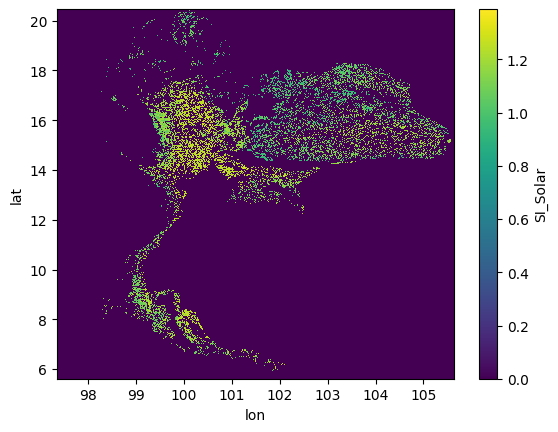

In [90]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetoforest.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[5])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[5])

xr_final_SI['AVA_Wind'] = xr.where( xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where( xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[5]
check_weight_solar = check_weight_solar + weight_solar[5]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

xr_final_SI['SI_Solar'].plot()

<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.40299999999999997
check w solar =  0.51
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(90696.78)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(94703.67)


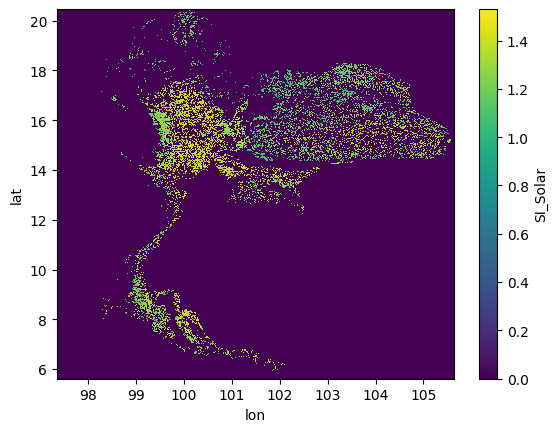

In [91]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetoroad.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[6])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[6])

xr_final_SI['AVA_Wind'] = xr.where(xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where(xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[6]
check_weight_solar = check_weight_solar + weight_solar[6]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

xr_final_SI['SI_Solar'].plot()

<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.491
check w solar =  0.609
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(90696.78)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(94703.67)


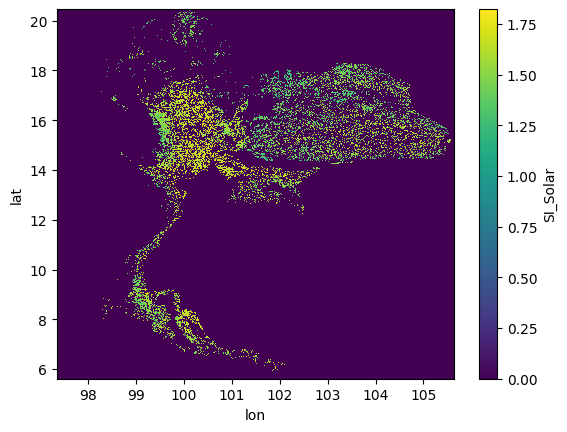

In [92]:
xr_cal = xr.open_dataset('Output\\xr_SI_Distancetosubstation.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[7])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[7])

xr_final_SI['AVA_Wind'] = xr.where(xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where(xr_cal['SI_Solar'] == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[7]
check_weight_solar = check_weight_solar + weight_solar[7]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

xr_final_SI['SI_Solar'].plot()

<xarray.Dataset>
Dimensions:    (lat: 5346, lon: 2985)
Coordinates:
  * lat        (lat) float64 5.615 5.618 5.621 5.624 ... 20.45 20.46 20.46 20.46
  * lon        (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Wind   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    AVA_Solar  (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Check w wind =  0.752
check w solar =  0.863
AVA Wind =  <xarray.DataArray 'AVA_Wind' ()>
array(90691.76, dtype=float32)
AVA Solar =  <xarray.DataArray 'AVA_Solar' ()>
array(94702.14, dtype=float32)


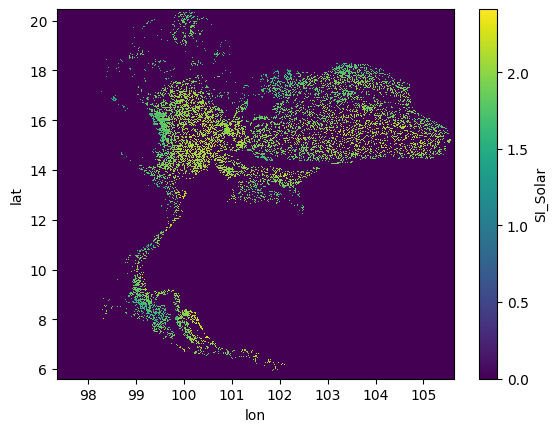

In [93]:
xr_cal = xr.open_dataset('Output\\xr_SI_resourcepotential.nc')

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'] + (xr_cal['SI_Wind'] * weight_wind[8])
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'] + (xr_cal['SI_Solar'] * weight_solar[8])

xr_final_SI['AVA_Wind'] = xr.where(xr_cal['SI_Wind'] == 0 ,0,xr_final_SI['AVA_Wind'])
xr_final_SI['AVA_Solar'] = xr.where(xr_cal['SI_Solar']  == 0 ,0,xr_final_SI['AVA_Solar'])

xr_final_SI['SI_Wind'] = xr_final_SI['SI_Wind'].astype('float32')
xr_final_SI['SI_Solar'] = xr_final_SI['SI_Solar'].astype('float32')
xr_final_SI['AVA_Wind'] = xr_final_SI['AVA_Wind'].astype('float32')
xr_final_SI['AVA_Solar'] = xr_final_SI['AVA_Solar'].astype('float32')

xr_final_SI['SI_Wind'] = xr.where( xr_final_SI['AVA_Wind'] == 0 ,0,xr_final_SI['SI_Wind'])
xr_final_SI['SI_Solar'] = xr.where( xr_final_SI['AVA_Solar'] == 0 ,0,xr_final_SI['SI_Solar'])
print(xr_final_SI)

check_weight_wind = check_weight_wind + weight_wind[8]
check_weight_solar = check_weight_solar + weight_solar[8]
print("Check w wind = ",check_weight_wind)
print("check w solar = ",check_weight_solar)
print("AVA Wind = ",xr_final_SI['AVA_Wind'].sum())
print("AVA Solar = ",xr_final_SI['AVA_Solar'].sum())

xr_final_SI['SI_Solar'].plot()

In [94]:
xr_final_SI['AVA_Wind'].to_netcdf(path='Output_SolarWind\\xr_AVA_Wind.nc')
xr_final_SI['AVA_Solar'].to_netcdf(path='Output_SolarWind\\xr_AVA_Solar.nc')

In [95]:
mwperkm2_wind = 4.5 ## originally 9 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET
mwperkm2_solar = 15 ## originally 30 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET

## max capacity of spp 90 MW
maxcapacityinpolygon = 90

maxarea_wind = 90/mwperkm2_wind
maxarea_solar= 90/mwperkm2_solar

print("maxarea_wind = ",maxarea_wind)
print("maxarea_solar = ",maxarea_solar)

maxarea_wind =  20.0
maxarea_solar =  6.0


In [150]:
### Polygonized wind ### 

mask = None
with rasterio.Env():
    with rasterio.open('Output_SolarWind\\xr_AVA_Wind.nc') as src:
        image = src.read(1) # first band
        results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            shapes(image, mask=mask, transform=src.transform,connectivity=8)))
        
geoms = list(results)

gpd_polygonized_raster_wind  = gpd.GeoDataFrame.from_features(geoms)
gpd_polygonized_raster_wind.crs = {'init': 'epsg:4326'}
gpd_polygonized_raster_wind= gpd_polygonized_raster_wind.to_crs({'init': 'epsg:3857'})
gpd_polygonized_raster_wind['area'] = gpd_polygonized_raster_wind['geometry'].area / (10**6)
gpd_polygonized_raster_wind = gpd_polygonized_raster_wind.to_crs({'init': 'epsg:4326'})
gpd_polygonized_raster_wind = gpd_polygonized_raster_wind.loc[gpd_polygonized_raster_wind['raster_val'] != 0]
gpd_polygonized_raster_wind = gpd_polygonized_raster_wind.loc[gpd_polygonized_raster_wind['area'] > 4]

gpd_polygonized_raster_wind_normal = gpd_polygonized_raster_wind.loc[gpd_polygonized_raster_wind['area'] <= maxarea_wind]
gpd_polygonized_raster_wind_normal.reset_index(inplace=True,drop=True)
gpd_polygonized_raster_wind_large = gpd_polygonized_raster_wind.loc[gpd_polygonized_raster_wind['area'] > maxarea_wind]
gpd_polygonized_raster_wind_large.reset_index(inplace=True,drop=True)

print(gpd_polygonized_raster_wind.columns)
print(len(gpd_polygonized_raster_wind))
print(len(gpd_polygonized_raster_wind_normal))
print(len(gpd_polygonized_raster_wind_large))

C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the prefe

Index(['geometry', 'raster_val', 'area'], dtype='object')
5420
4614
806


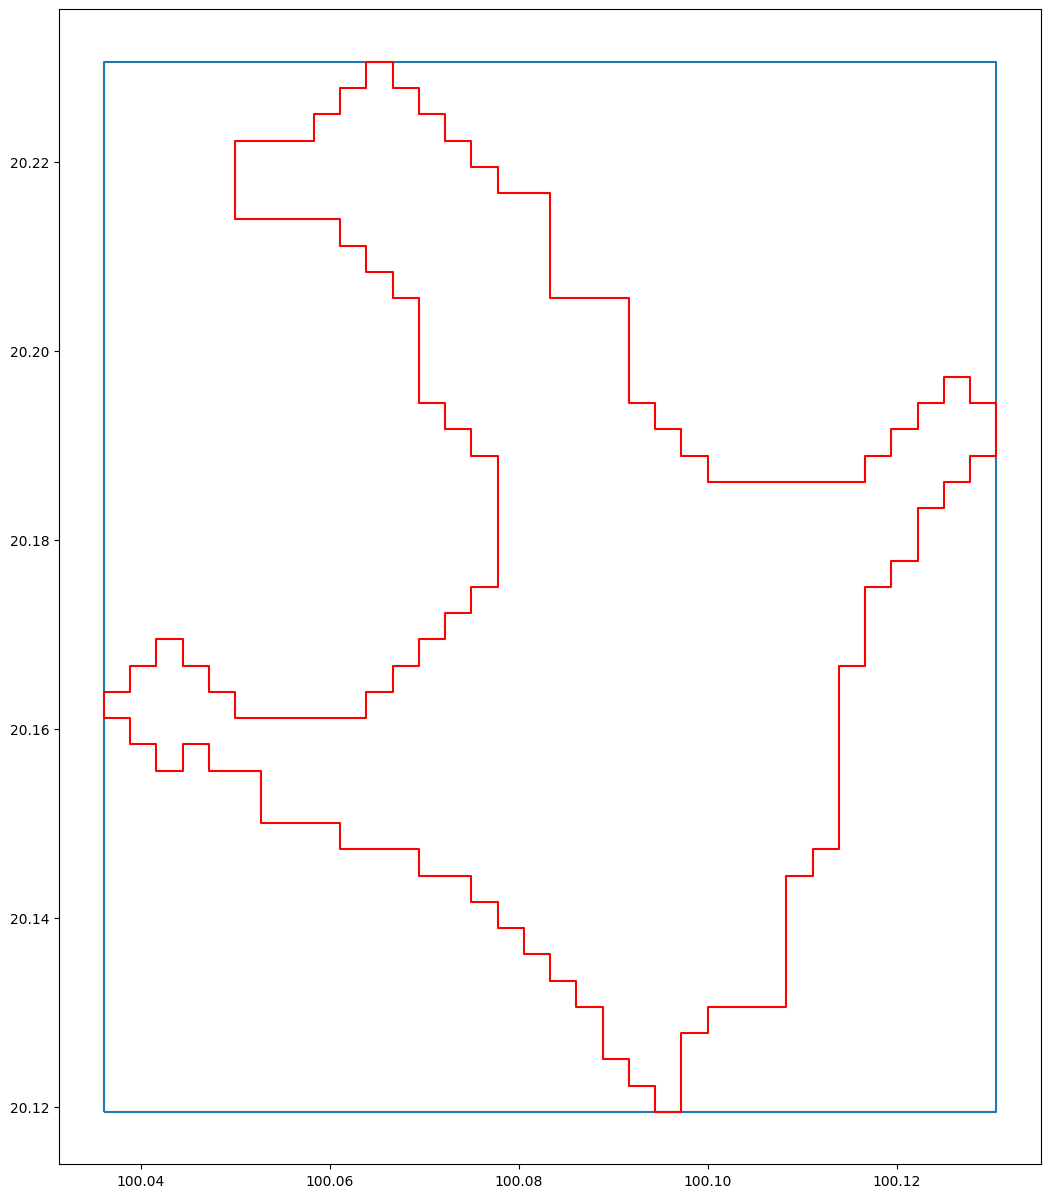

In [160]:
from shapely.geometry import Polygon
from shapely.prepared import prep

def grid_bounds(geom, delta):
    minx, miny, maxx, maxy = geom.bounds
    nx = int((maxx - minx)/delta)
    ny = int((maxy - miny)/delta)
    gx, gy = np.linspace(minx,maxx,nx), np.linspace(miny,maxy,ny)
    grid = []
    for i in range(len(gx)-1):
        for j in range(len(gy)-1):
            poly_ij = Polygon([[gx[i],gy[j]],[gx[i],gy[j+1]],[gx[i+1],gy[j+1]],[gx[i+1],gy[j]]])
            grid.append( poly_ij )
    return grid

def partition(geom, delta):
    prepared_geom = prep(geom)
    grid = list(filter(prepared_geom.intersects, grid_bounds(geom, delta)))
    return grid

geom = (gpd_polygonized_raster_wind_large['geometry'][1])
# geom = Polygon([[0,0],[0,2],[1.5,1],[0.5,-0.5],[0,0]])
grid = partition(geom, 0.045)


fig, ax = plt.subplots(figsize=(15, 15))
gpd.GeoSeries(grid).boundary.plot(ax=ax)
gpd.GeoSeries([geom]).boundary.plot(ax=ax,color="red")
plt.show()


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_29256\3494281163.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use

len of polygons =  5431


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_29256\3494281163.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpd_polygonized_raster_wind['fromraster_SI_Wind'][i] = df_xr_final_SI['SI_Wind'].loc[df_xr_final_SI['geometry'].within(pol)].mean()
C:\Users\EGAT\AppData\Local\Temp\ipykernel_29256\3494281163.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

0  ---  1.8177476558685304


C:\Users\EGAT\AppData\Local\Temp\ipykernel_29256\3494281163.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xr_final_SI_wind['final_SI_Wind'].loc[df_xr_final_SI_wind['geometry'].within(gpd_polygonized_raster_wind['geometry'][i])] = gpd_polygonized_raster_wind['Overlaid_SI_Wind'][i]


1  ---  1.8712257776260377
2  ---  1.808411780357361
3  ---  1.8387306365966798
4  ---  1.8391026887893678
5  ---  1.8620684776306153
6  ---  1.80301171875
7  ---  1.8148308429718019
8  ---  1.8227259550094606
9  ---  1.8488578233718873
10  ---  1.8180838260650636
11  ---  1.8641740713119508
12  ---  1.8618275556564332
13  ---  1.8655579719543458
14  ---  1.8195017013549806
15  ---  1.8148351345062257
16  ---  1.896749559402466
17  ---  1.8569913539886476
18  ---  1.8124781284332276
19  ---  1.8557420406341554
20  ---  1.9085875186920167
21  ---  1.878627959251404
22  ---  1.8499309453964234
23  ---  1.8268535766601564
24  ---  1.7940004501342774
25  ---  1.8115125331878663
26  ---  1.8807677659988404
27  ---  1.7880422506332398
28  ---  1.8397071990966798
29  ---  1.9016799364089967
30  ---  1.783861819267273
31  ---  1.896004382133484
32  ---  1.7839387092590333
33  ---  1.7841016683578492
34  ---  1.712689283847809
35  ---  1.775105658531189
36  ---  1.8749181661605836
37  ---  1.88

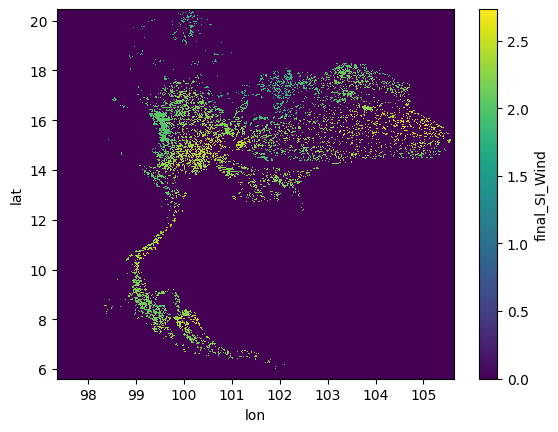

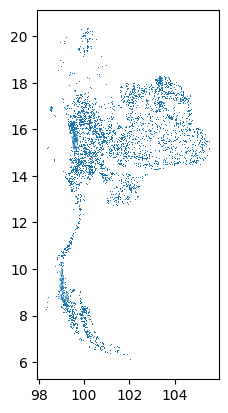

In [ ]:
# mask = None
# with rasterio.Env():
#     with rasterio.open('Output_SolarWind\\xr_AVA_Wind.nc') as src:
#         image = src.read(1) # first band
#         results = (
#         {'properties': {'raster_val': v}, 'geometry': s}
#         for i, (s, v) 
#         in enumerate(
#             shapes(image, mask=mask, transform=src.transform,connectivity=8)))


# geoms = list(results)

# gpd_polygonized_raster_wind  = gpd.GeoDataFrame.from_features(geoms)
# gpd_polygonized_raster_wind.crs = {'init': 'epsg:4326'}
# gpd_polygonized_raster_wind= gpd_polygonized_raster_wind.to_crs({'init': 'epsg:3857'})
# gpd_polygonized_raster_wind['area'] = gpd_polygonized_raster_wind['geometry'].area / (10**6)
# gpd_polygonized_raster_wind = gpd_polygonized_raster_wind.to_crs({'init': 'epsg:4326'})
# gpd_polygonized_raster_wind['center'] = gpd_polygonized_raster_wind['geometry'].centroid
# gpd_polygonized_raster_wind = gpd_polygonized_raster_wind.loc[gpd_polygonized_raster_wind['raster_val'] != 0]
# gpd_polygonized_raster_wind = gpd_polygonized_raster_wind.loc[gpd_polygonized_raster_wind['area'] > 4]
# gpd_polygonized_raster_wind.reset_index(inplace=True,drop=True)
# gpd_polygonized_raster_wind['raster_val'] = 0
# gpd_polygonized_raster_wind['raster_val'].loc[gpd_polygonized_raster_wind['area'] < 4] = 0
# gpd_polygonized_raster_wind['raster_val'].loc[gpd_polygonized_raster_wind['area'] >= 4] = 3
# gpd_polygonized_raster_wind['fromraster_SI_Wind'] = 0
# gpd_polygonized_raster_wind['Overlaid_SI_Wind'] = 0
# print('len of polygons = ', len(gpd_polygonized_raster_wind))

# df_xr_final_SI = xr_final_SI['SI_Wind'].to_dataframe()
# df_xr_final_SI.reset_index(inplace=True)
# df_xr_final_SI = gpd.GeoDataFrame(df_xr_final_SI, geometry =gpd.points_from_xy(df_xr_final_SI['lon'],df_xr_final_SI['lat']))
# df_xr_final_SI_wind = gpd.GeoDataFrame(df_xr_final_SI, geometry =gpd.points_from_xy(df_xr_final_SI['lon'],df_xr_final_SI['lat']))
# df_xr_final_SI.crs = {'init': 'epsg:4326'}
# df_xr_final_SI_wind.crs = {'init': 'epsg:4326'}

# df_xr_final_SI_wind['final_SI_Wind'] = 0
# df_xr_final_SI_wind = df_xr_final_SI_wind.drop(columns=['SI_Wind'])

# # for i in range(len(gpd_polygonized_raster_wind)):
# for i , pol in enumerate(gpd_polygonized_raster_wind['geometry']):
#     try :
#         gpd_polygonized_raster_wind['fromraster_SI_Wind'][i] = df_xr_final_SI['SI_Wind'].loc[df_xr_final_SI['geometry'].within(pol)].mean()
#         gpd_polygonized_raster_wind['Overlaid_SI_Wind'][i] = (gpd_polygonized_raster_wind['raster_val'][i] * weight_wind[9]) + gpd_polygonized_raster_wind['fromraster_SI_Wind'][i]
#         print(i,' --- ',gpd_polygonized_raster_wind['Overlaid_SI_Wind'][i])
#     except :
#         print(i, " is an error")
    
#     df_xr_final_SI_wind['final_SI_Wind'].loc[df_xr_final_SI_wind['geometry'].within(gpd_polygonized_raster_wind['geometry'][i])] = gpd_polygonized_raster_wind['Overlaid_SI_Wind'][i]


# df_xr_final_SI_wind = df_xr_final_SI_wind.drop(columns='geometry')
# df_xr_final_SI_wind = df_xr_final_SI_wind.set_index(['lat', 'lon'])
# xr_final_SI_wind = xr.Dataset.from_dataframe(df_xr_final_SI_wind)
# print(xr_final_SI_wind)
# xr_final_SI_wind.to_netcdf(path='Output_SolarWind\\xr_final_SI_Wind.nc')
# xr_final_SI_wind['final_SI_Wind'].plot()

# print('total area for wind = ',gpd_polygonized_raster_wind['area'].sum())
# print(gpd_polygonized_raster_wind)
# gpd_polygonized_raster_wind.plot()

# gpd_polygonized_raster_wind.to_csv('Output_SolarWind\\df_final_SI_Wind.csv',index=False)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_29256\3233334735.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use

len of polygons =  17006


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_29256\3233334735.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpd_polygonized_raster_solar['fromraster_SI_Solar'][i] = df_xr_final_SI['SI_Solar'].loc[df_xr_final_SI['geometry'].within(pol)].mean()
C:\Users\EGAT\AppData\Local\Temp\ipykernel_29256\3233334735.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

0  ---  2.0603964614868167


C:\Users\EGAT\AppData\Local\Temp\ipykernel_29256\3233334735.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xr_final_SI_solar['final_SI_Solar'].loc[df_xr_final_SI_solar['geometry'].within(gpd_polygonized_raster_solar['geometry'][i])] = gpd_polygonized_raster_solar['Overlaid_SI_Solar'][i]


1  ---  2.214612274169922
2  ---  2.1453041124343875
3  ---  2.2188196468353274
4  ---  2.2236455965042117
5  ---  2.2252279806137087
6  ---  2.2050875711441043
7  ---  2.033684997558594
8  ---  1.9191018629074097
9  ---  2.0244425821304324
10  ---  2.181093125343323
11  ---  2.151981263160706
12  ---  2.2192218589782717
13  ---  2.1477299022674563
14  ---  2.2292993354797366
15  ---  2.2245651769638064
16  ---  2.23176374912262
17  ---  2.211102514266968
18  ---  2.038555054664612
19  ---  2.235833435058594
20  ---  2.029573826789856
21  ---  2.2173582601547244
22  ---  2.2254445838928225
23  ---  1.7251510906219483
24  ---  2.2151166486740115
25  ---  2.2134410429000857
26  ---  1.8905413436889649
27  ---  1.9200701999664307
28  ---  2.063449172973633
29  ---  2.221809177398682
30  ---  2.1832111167907717
31  ---  2.226172595024109
32  ---  2.2295522975921633
33  ---  2.101842193603516
34  ---  2.2404642391204836
35  ---  1.9019463348388672
36  ---  2.168989806175232
37  ---  2.25849

<Axes: >

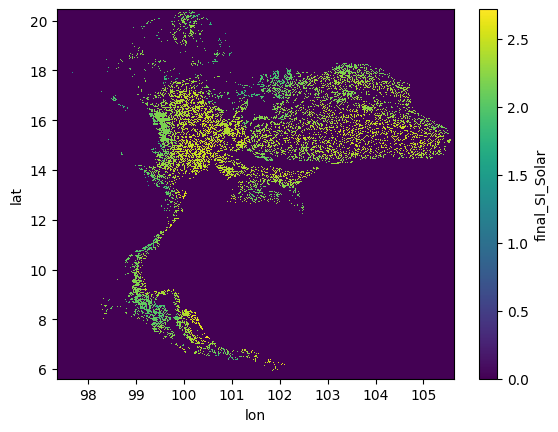

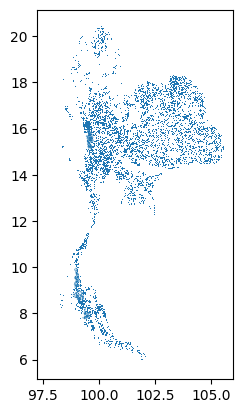

In [ ]:
# mask = None
# with rasterio.Env():
#     with rasterio.open('Output_SolarWind\\xr_AVA_Solar.nc') as src:
#         image = src.read(1) # first band
#         results = (
#         {'properties': {'raster_val': v}, 'geometry': s}
#         for i, (s, v) 
#         in enumerate(
#             shapes(image, mask=mask, transform=src.transform,connectivity=8)))

# geoms = list(results)

# gpd_polygonized_raster_solar  = gpd.GeoDataFrame.from_features(geoms)
# gpd_polygonized_raster_solar.crs = {'init': 'epsg:4326'}
# gpd_polygonized_raster_solar= gpd_polygonized_raster_solar.to_crs({'init': 'epsg:3857'})
# gpd_polygonized_raster_solar['area'] = gpd_polygonized_raster_solar['geometry'].area / (10**6)
# gpd_polygonized_raster_solar = gpd_polygonized_raster_solar.to_crs({'init': 'epsg:4326'})
# gpd_polygonized_raster_solar['center'] = gpd_polygonized_raster_solar['geometry'].centroid
# gpd_polygonized_raster_solar = gpd_polygonized_raster_solar.loc[gpd_polygonized_raster_solar['raster_val'] != 0]
# gpd_polygonized_raster_solar = gpd_polygonized_raster_solar.loc[gpd_polygonized_raster_solar['area'] > 0.4]
# gpd_polygonized_raster_solar.reset_index(inplace=True,drop=True)
# gpd_polygonized_raster_solar['raster_val'] = 0
# gpd_polygonized_raster_solar['raster_val'].loc[gpd_polygonized_raster_solar['area'] < 0.4] = 0
# gpd_polygonized_raster_solar['raster_val'].loc[gpd_polygonized_raster_solar['area'] >= 0.4] = 3
# gpd_polygonized_raster_solar['fromraster_SI_Solar'] = 0
# gpd_polygonized_raster_solar['Overlaid_SI_Solar'] = 0
# print('len of polygons = ', len(gpd_polygonized_raster_solar))

# df_xr_final_SI = xr_final_SI['SI_Solar'].to_dataframe()
# df_xr_final_SI.reset_index(inplace=True)
# df_xr_final_SI = gpd.GeoDataFrame(df_xr_final_SI, geometry =gpd.points_from_xy(df_xr_final_SI['lon'],df_xr_final_SI['lat']))
# df_xr_final_SI_solar = gpd.GeoDataFrame(df_xr_final_SI, geometry =gpd.points_from_xy(df_xr_final_SI['lon'],df_xr_final_SI['lat']))
# df_xr_final_SI.crs = {'init': 'epsg:4326'}
# df_xr_final_SI_solar.crs = {'init': 'epsg:4326'}

# df_xr_final_SI_solar['final_SI_Solar'] = 0
# df_xr_final_SI_solar = df_xr_final_SI_solar.drop(columns=['SI_Solar'])

# for i in range(len(gpd_polygonized_raster_solar)):
# for i , pol in enumerate(gpd_polygonized_raster_solar['geometry']):
#     try :
#         gpd_polygonized_raster_solar['fromraster_SI_Solar'][i] = df_xr_final_SI['SI_Solar'].loc[df_xr_final_SI['geometry'].within(pol)].mean()
#         gpd_polygonized_raster_solar['Overlaid_SI_Solar'][i] = (gpd_polygonized_raster_solar['raster_val'][i] * weight_solar[9]) + gpd_polygonized_raster_solar['fromraster_SI_Solar'][i]
#         print(i,' --- ',gpd_polygonized_raster_solar['Overlaid_SI_Solar'][i])
#     except :
#         print(i, " is an error")
    
#     df_xr_final_SI_solar['final_SI_Solar'].loc[df_xr_final_SI_solar['geometry'].within(gpd_polygonized_raster_solar['geometry'][i])] = gpd_polygonized_raster_solar['Overlaid_SI_Solar'][i]


# df_xr_final_SI_solar = df_xr_final_SI_solar.drop(columns='geometry')
# df_xr_final_SI_solar = df_xr_final_SI_solar.set_index(['lat', 'lon'])
# xr_final_SI_solar = xr.Dataset.from_dataframe(df_xr_final_SI_solar)
# print(xr_final_SI_solar)
# xr_final_SI_solar.to_netcdf(path='Output_SolarWind\\xr_final_SI_Solar.nc')
# gpd_polygonized_raster_solar.to_csv('Output_SolarWind\\df_final_SI_Solar.csv',index=False)
# xr_final_SI_solar['final_SI_Solar'].plot()

# print('total area for solar = ',gpd_polygonized_raster_solar['area'].sum())
# print(gpd_polygonized_raster_solar)
# gpd_polygonized_raster_solar.plot()